# Taxi Booking Analysis using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
missing_values=["N/a","na",np.nan]
data = pd.read_csv(r"/home/kayum/DataScienceProjects/nyc_taxis.csv",na_values=missing_values)

In [3]:
data

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
0,2016,1,1,5,0,2,4,21.00,2037,52.0,0.8,5.54,11.65,69.99,1
1,2016,1,1,5,0,2,1,16.29,1520,45.0,1.3,0.00,8.00,54.30,1
2,2016,1,1,5,0,2,6,12.70,1462,36.5,1.3,0.00,0.00,37.80,2
3,2016,1,1,5,0,2,6,8.70,1210,26.0,1.3,0.00,5.46,32.76,1
4,2016,1,1,5,0,2,6,5.56,759,17.5,1.3,0.00,0.00,18.80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,2016,6,30,4,5,3,4,9.50,1989,31.0,1.3,5.54,3.00,40.84,1
89556,2016,6,30,4,5,2,4,19.80,2368,52.0,0.8,5.54,0.00,58.34,1
89557,2016,6,30,4,5,2,4,17.48,2822,52.0,0.8,5.54,5.00,63.34,1
89558,2016,6,30,4,5,2,6,12.76,1083,34.5,1.3,0.00,8.95,44.75,1


In [ ]:
# Data Cleanning for better modeling and visualization

In [4]:
data.isnull().sum()

pickup_year              0
pickup_month             0
pickup_day               0
pickup_dayofweek         0
pickup_time              0
pickup_location_code     0
dropoff_location_code    0
trip_distance            0
trip_length              0
fare_amount              0
fees_amount              0
tolls_amount             0
tip_amount               0
total_amount             0
payment_type             0
dtype: int64

In [ ]:
# In this data set,there are no missing values

In [ ]:
# Find out the duplicate values 

In [8]:
duplicate=data[data.duplicated()]
print(duplicate)

       pickup_year  pickup_month  pickup_day  pickup_dayofweek  pickup_time  \
39962         2016             3          27                 7            3   
79638         2016             6          12                 7            2   

       pickup_location_code  dropoff_location_code  trip_distance  \
39962                     2                      2           0.00   
79638                     3                      6           4.36   

       trip_length  fare_amount  fees_amount  tolls_amount  tip_amount  \
39962           40         52.0          0.8          5.54       11.67   
79638          736         15.5          0.8          0.00        3.26   

       total_amount  payment_type  
39962         70.01             1  
79638         19.56             1  


In [ ]:
# Removed duplicate values

In [9]:
data.drop_duplicates()

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
0,2016,1,1,5,0,2,4,21.00,2037,52.0,0.8,5.54,11.65,69.99,1
1,2016,1,1,5,0,2,1,16.29,1520,45.0,1.3,0.00,8.00,54.30,1
2,2016,1,1,5,0,2,6,12.70,1462,36.5,1.3,0.00,0.00,37.80,2
3,2016,1,1,5,0,2,6,8.70,1210,26.0,1.3,0.00,5.46,32.76,1
4,2016,1,1,5,0,2,6,5.56,759,17.5,1.3,0.00,0.00,18.80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,2016,6,30,4,5,3,4,9.50,1989,31.0,1.3,5.54,3.00,40.84,1
89556,2016,6,30,4,5,2,4,19.80,2368,52.0,0.8,5.54,0.00,58.34,1
89557,2016,6,30,4,5,2,4,17.48,2822,52.0,0.8,5.54,5.00,63.34,1
89558,2016,6,30,4,5,2,6,12.76,1083,34.5,1.3,0.00,8.95,44.75,1


In [ ]:
#Find the mean speed of all the rides

In [18]:
speed=data['trip_distance']/data['trip_length']/3600
print(speed)

0        0.000003
1        0.000003
2        0.000002
3        0.000002
4        0.000002
           ...   
89555    0.000001
89556    0.000002
89557    0.000002
89558    0.000003
89559    0.000003
Length: 89560, dtype: float64


In [25]:
speed=data['trip_distance']/data['trip_length']/3600
mean_speed=speed.mean()
print(mean_speed)

2.487853843306769e-06


In [ ]:
#Find the number of rides taken in February

In [22]:
data.loc[data['pickup_month']==2].count()

pickup_year              13333
pickup_month             13333
pickup_day               13333
pickup_dayofweek         13333
pickup_time              13333
pickup_location_code     13333
dropoff_location_code    13333
trip_distance            13333
trip_length              13333
fare_amount              13333
fees_amount              13333
tolls_amount             13333
tip_amount               13333
total_amount             13333
payment_type             13333
dtype: int64

In [ ]:
#Find numbers of rides where tip is more than $50

In [5]:
tip=data.loc[data['tip_amount']>50].count()
print(tip)

pickup_year              16
pickup_month             16
pickup_day               16
pickup_dayofweek         16
pickup_time              16
pickup_location_code     16
dropoff_location_code    16
trip_distance            16
trip_length              16
fare_amount              16
fees_amount              16
tolls_amount             16
tip_amount               16
total_amount             16
payment_type             16
dtype: int64


In [ ]:
#Find the number of rides where drop was JFK airport taxi. (given: The code for JFK airport is 2)

In [6]:
dropoff=data.loc[data['dropoff_location_code']==2].count()
print(dropoff)

pickup_year              11832
pickup_month             11832
pickup_day               11832
pickup_dayofweek         11832
pickup_time              11832
pickup_location_code     11832
dropoff_location_code    11832
trip_distance            11832
trip_length              11832
fare_amount              11832
fees_amount              11832
tolls_amount             11832
tip_amount               11832
total_amount             11832
payment_type             11832
dtype: int64


In [ ]:
#Histogram by matplotlib.pyplot

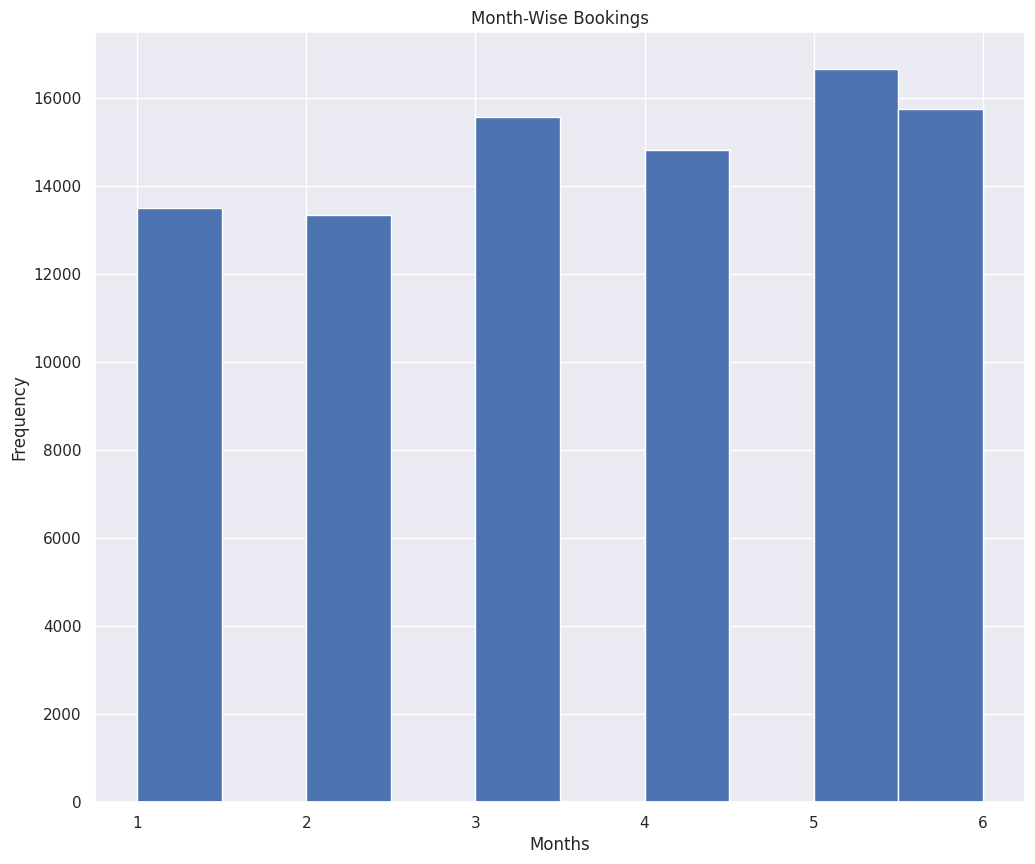

In [29]:
data['pickup_month'].plot(kind='hist')
plt.title('Month-Wise Bookings')
plt.xlabel('Trips')
plt.xlabel('Months')
plt.show()

In [ ]:
# Bookings are almost same in every months but at May month its highest amongs all the months.

In [ ]:
#Scatter Plot in Matplotlib.pyplot

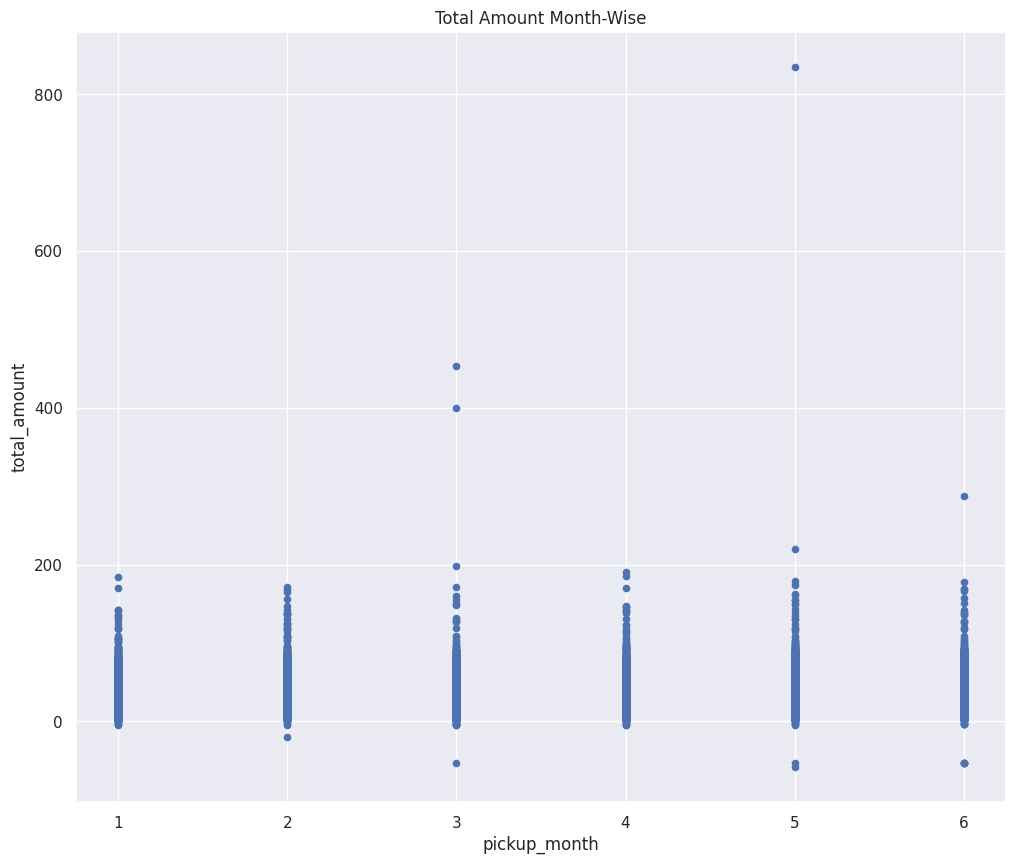

In [24]:
data.plot(kind='scatter',x='pickup_month',y='total_amount')
plt.title('Total Amount Month-Wise')
plt.show()

In [ ]:
# From the above ScatterPlot we can see the prices of the trips are belongs 0 to 200

/tmp/ipykernel_4463/3571022929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["pickup_month"])


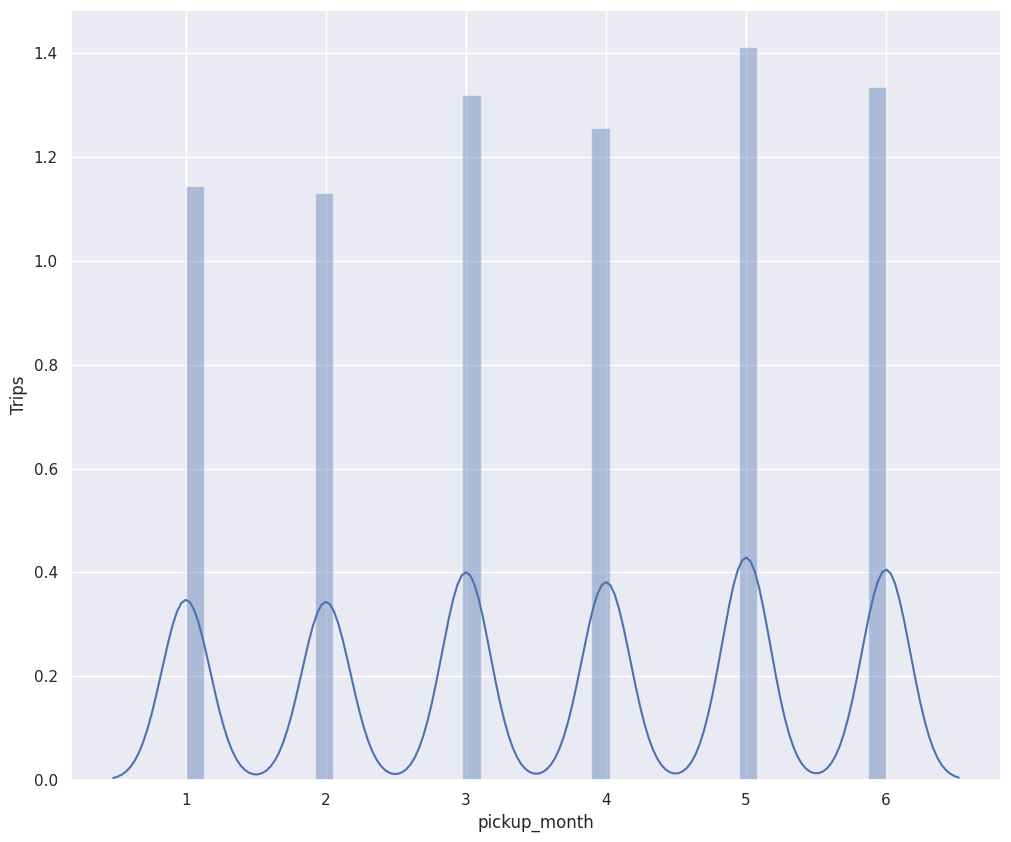

In [30]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["pickup_month"])
plt.ylabel('Trips')
plt.show()

/tmp/ipykernel_4463/3412845780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["trip_distance"])


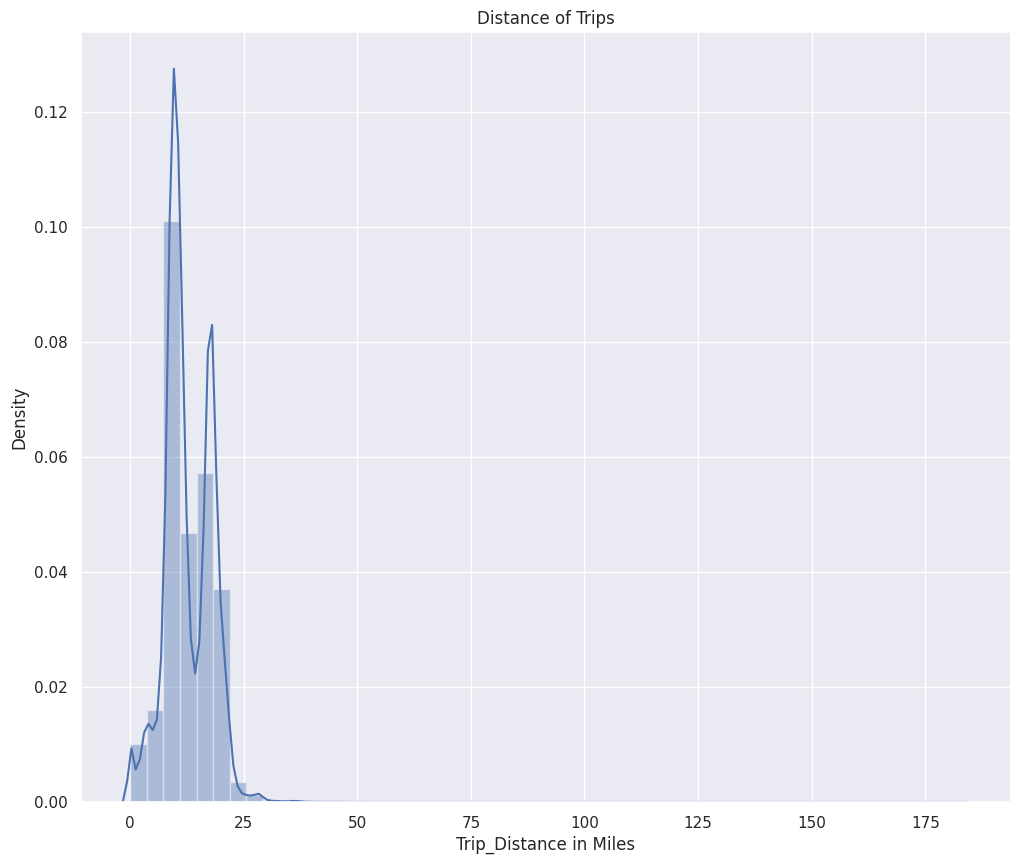

In [32]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["trip_distance"])
plt.title('Distance of Trips')
plt.xlabel('Trip_Distance in Miles')
plt.show()

In [ ]:
# From the above diagram we can see highest frequency of the trip distance is about 10 miles

/tmp/ipykernel_4463/3491806390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["pickup_dayofweek"])


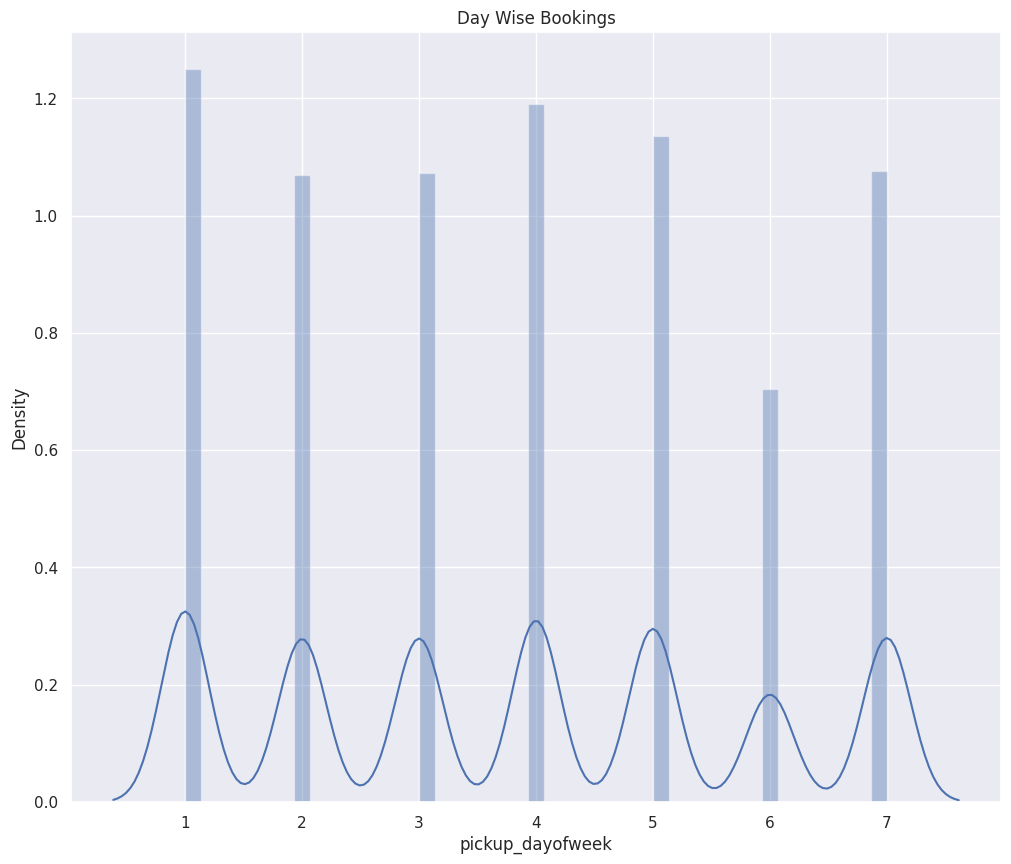

In [21]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["pickup_dayofweek"])
plt.title('Day Wise Bookings')
plt.show()

In [ ]:
#By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends.